In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from windrose import WindroseAxes
%matplotlib inline


In [4]:
df = pd.read_csv('../data/benin-malanville.csv')  
df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [5]:
df.describe()


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [6]:
df.isna().sum()


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [11]:
missing = df.isna().mean() * 100
missing[missing > 5]


Comments    100.0
dtype: float64

In [15]:
z_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[z_columns].apply(zscore)

# Flag outliers
outliers = (np.abs(z_scores) > 3).sum()
outliers


GHI         89
DNI          0
DHI       3738
ModA        27
ModB        63
WS        3109
WSgust    3500
dtype: int64

In [16]:
df_clean = df.copy()
df_clean.fillna(df_clean.median(numeric_only=True), inplace=True)

In [17]:
df_clean.to_csv('../data/benin_clean.csv', index=False)


<Figure size 1200x600 with 0 Axes>

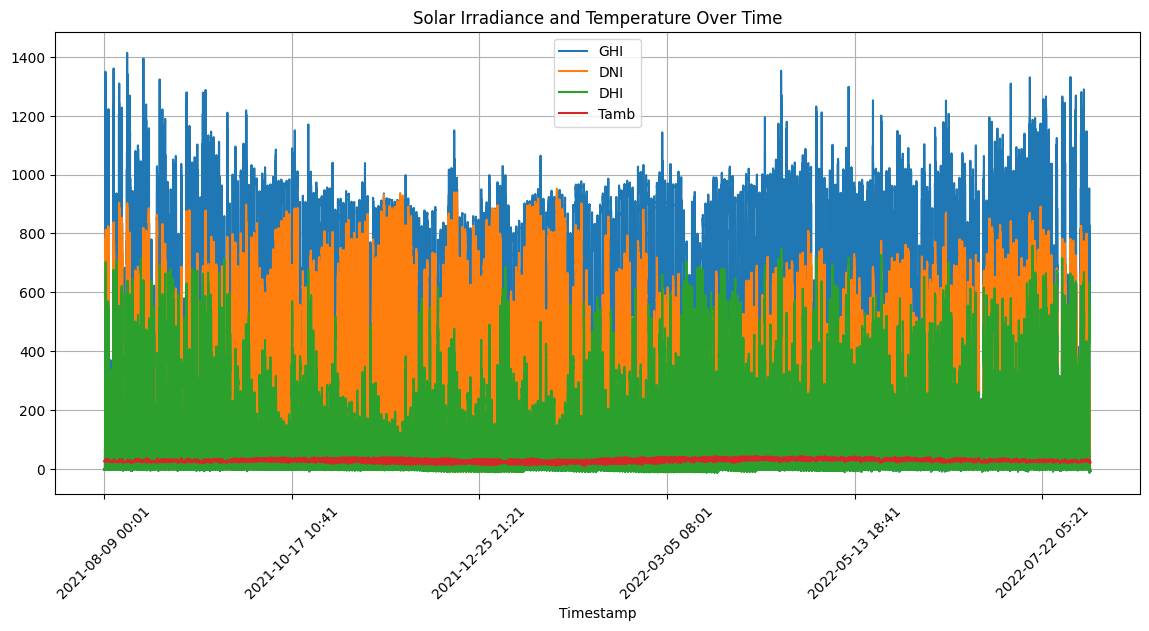

In [18]:
plt.figure(figsize=(12, 6))
df_clean.plot(x='Timestamp', y=['GHI', 'DNI', 'DHI', 'Tamb'], figsize=(14, 6))
plt.title("Solar Irradiance and Temperature Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()


### 📈 Time-Series Insight: Solar Irradiance and Air Temperature

This time series shows the trends of **GHI, DNI, DHI, and Tamb** over time:

- **GHI** and **DNI** exhibit a clear daily cycle with midday peaks.
- **DHI** tends to be lower than the other two but follows the same type of periodicity.
- **Tamb** also exhibits diurnal variation, rising through the day and falling through the night.
- Peaks in solar radiation and temperature are related to each other; solar radiation affects ambient temperature.
- The occasional sudden drop or flat line could indicate missing or erroneous sensor data on those days.

In [20]:
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])


In [21]:
midpoint = df_clean['Timestamp'].median()
df_clean['CleaningFlag'] = (df_clean['Timestamp'] >= midpoint).astype(int)

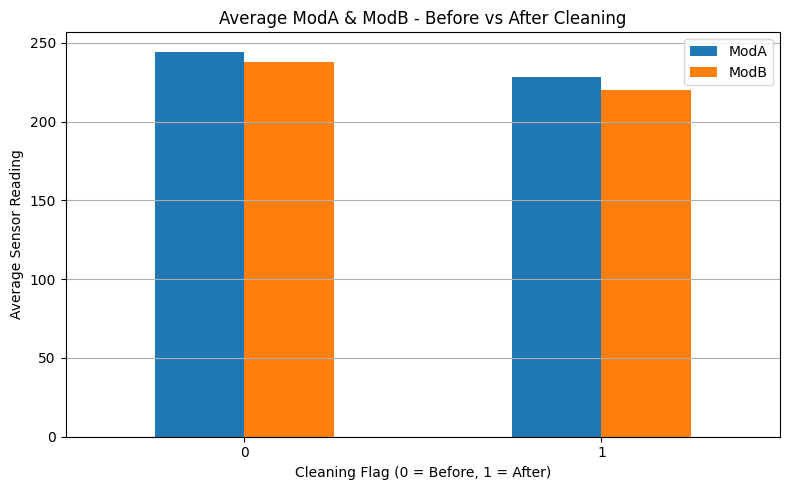

In [22]:
df_clean.groupby('CleaningFlag')[['ModA', 'ModB']].mean().plot(kind='bar', figsize=(8,5))
plt.title("Average ModA & ModB - Before vs After Cleaning")
plt.ylabel("Average Sensor Reading")
plt.xlabel("Cleaning Flag (0 = Before, 1 = After)")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


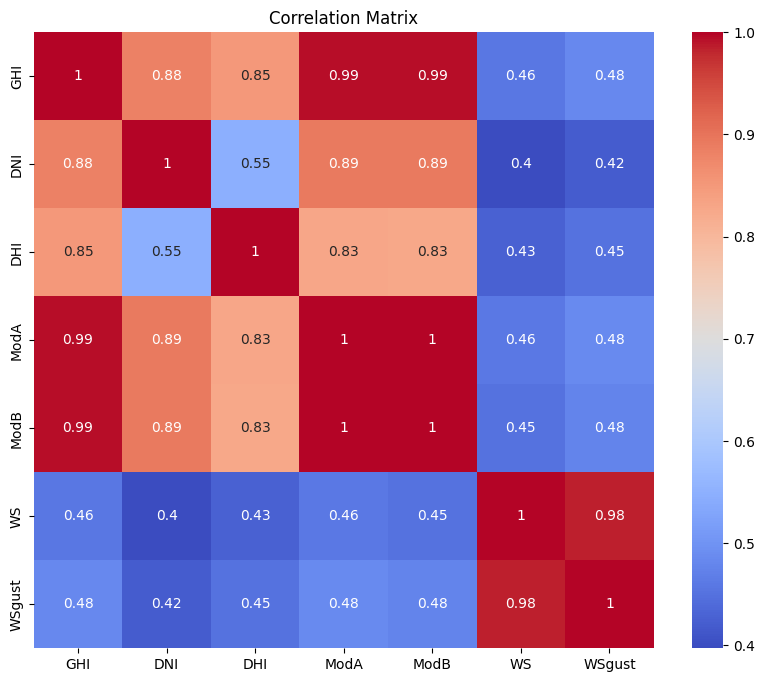

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean[z_columns].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


<Axes: xlabel='WS', ylabel='GHI'>

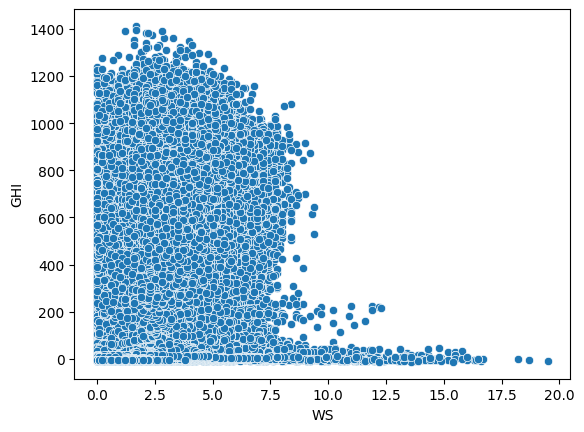

In [24]:
sns.scatterplot(data=df_clean, x='WS', y='GHI')


Text(0.5, 1.0, 'GHI vs Tamb (Bubble size = RH)')

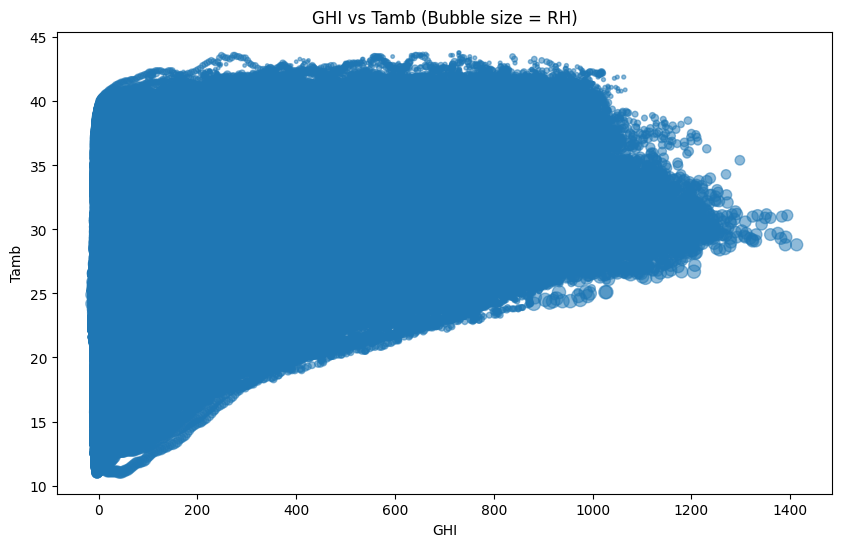

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['GHI'], df_clean['Tamb'], s=df_clean['RH'], alpha=0.5)
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('GHI vs Tamb (Bubble size = RH)')


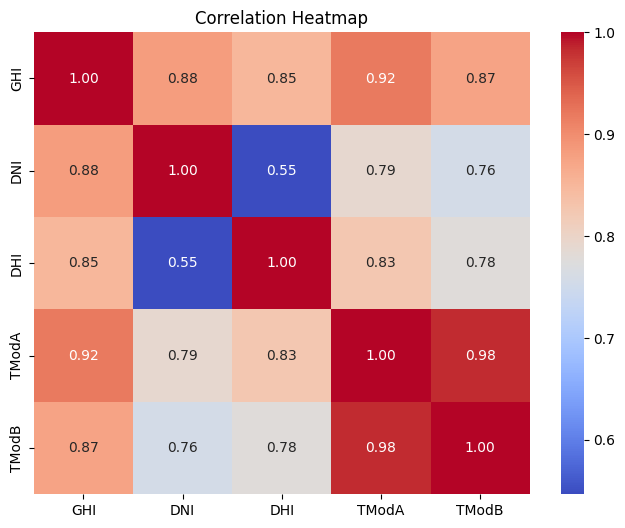

In [28]:
# Select the relevant columns
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_matrix = df_clean[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

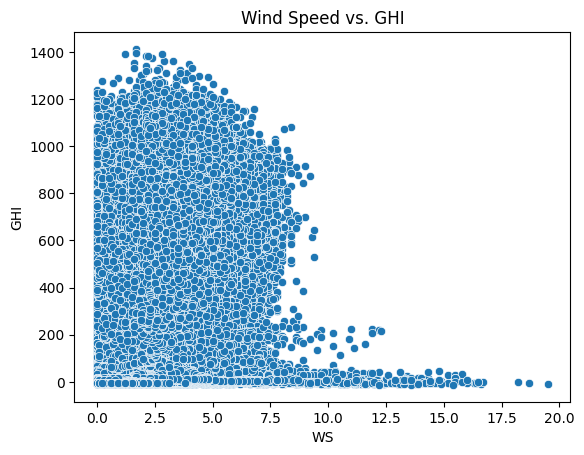

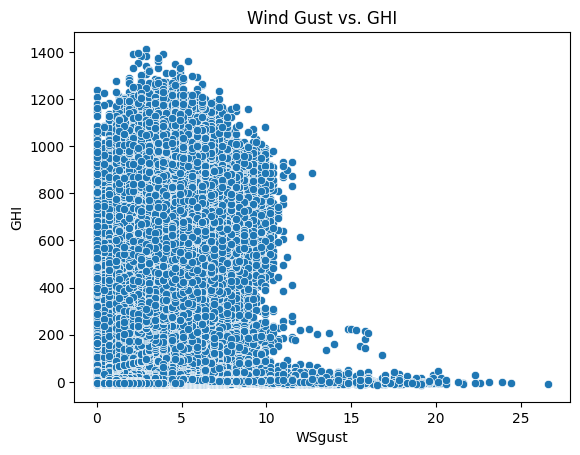

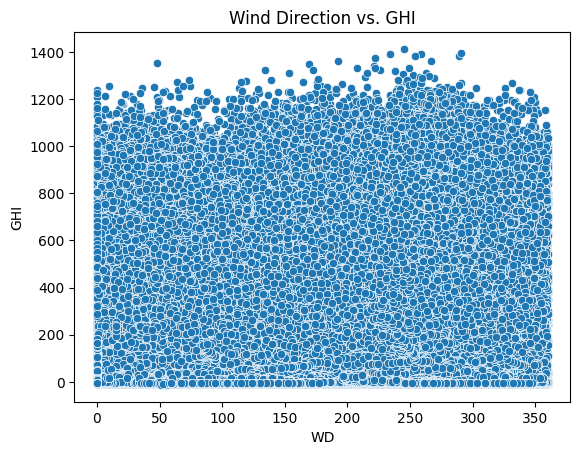

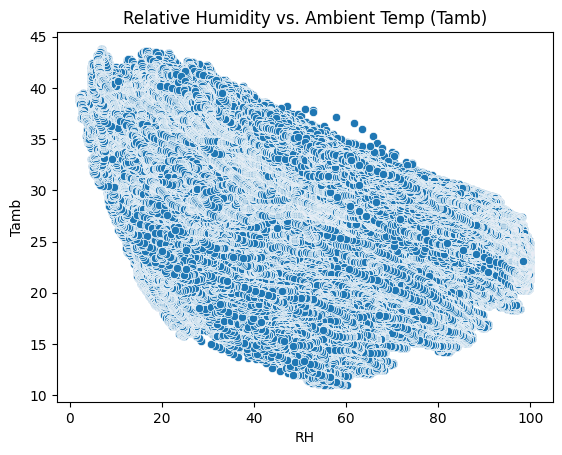

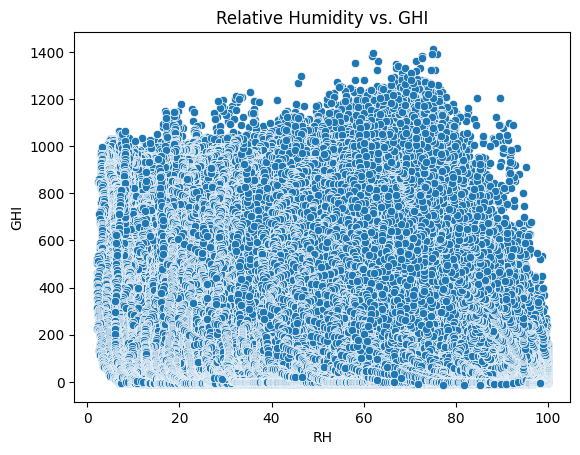

In [29]:
# Wind Speed vs. GHI
sns.scatterplot(data=df_clean, x='WS', y='GHI')
plt.title("Wind Speed vs. GHI")
plt.show()

# Wind Gust vs. GHI
sns.scatterplot(data=df_clean, x='WSgust', y='GHI')
plt.title("Wind Gust vs. GHI")
plt.show()

# Wind Direction vs. GHI
sns.scatterplot(data=df_clean, x='WD', y='GHI')
plt.title("Wind Direction vs. GHI")
plt.show()

# RH vs. Tamb
sns.scatterplot(data=df_clean, x='RH', y='Tamb')
plt.title("Relative Humidity vs. Ambient Temp (Tamb)")
plt.show()

# RH vs. GHI
sns.scatterplot(data=df_clean, x='RH', y='GHI')
plt.title("Relative Humidity vs. GHI")
plt.show()


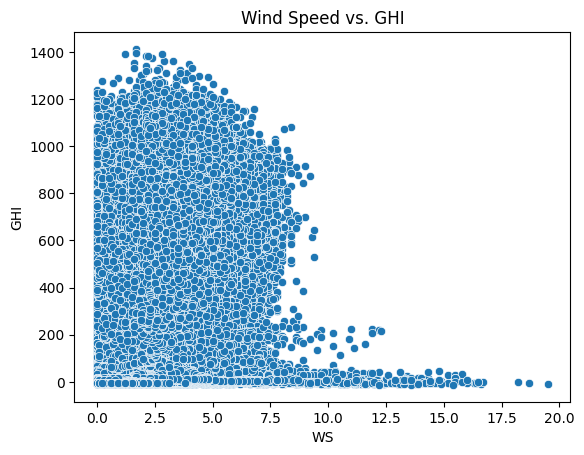

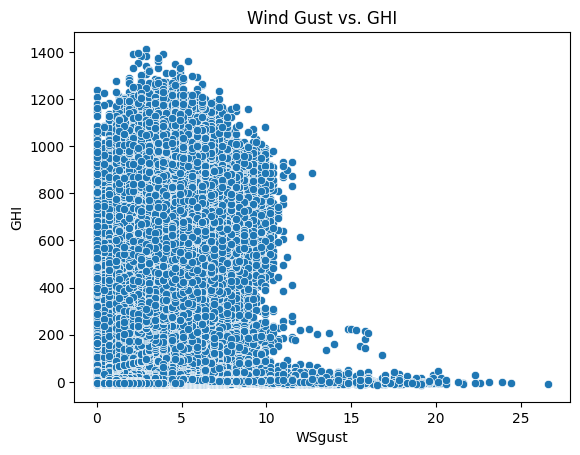

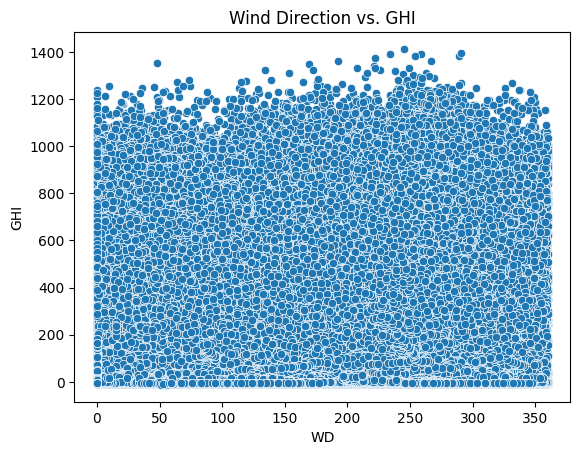

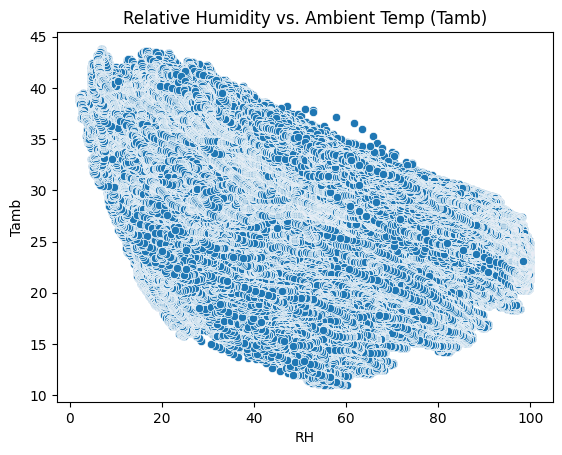

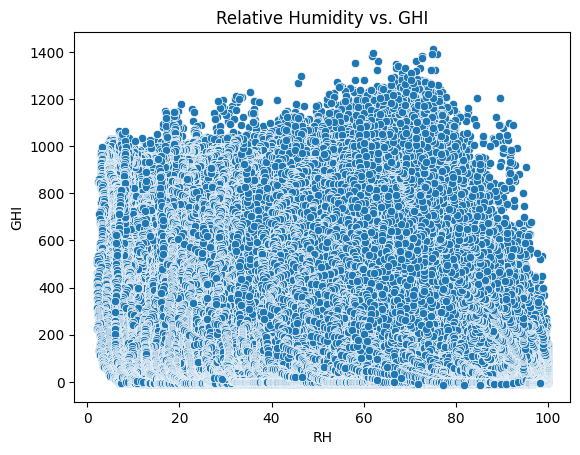

In [29]:
# Wind Speed vs. GHI
sns.scatterplot(data=df_clean, x='WS', y='GHI')
plt.title("Wind Speed vs. GHI")
plt.show()

# Wind Gust vs. GHI
sns.scatterplot(data=df_clean, x='WSgust', y='GHI')
plt.title("Wind Gust vs. GHI")
plt.show()

# Wind Direction vs. GHI
sns.scatterplot(data=df_clean, x='WD', y='GHI')
plt.title("Wind Direction vs. GHI")
plt.show()

# RH vs. Tamb
sns.scatterplot(data=df_clean, x='RH', y='Tamb')
plt.title("Relative Humidity vs. Ambient Temp (Tamb)")
plt.show()

# RH vs. GHI
sns.scatterplot(data=df_clean, x='RH', y='GHI')
plt.title("Relative Humidity vs. GHI")
plt.show()


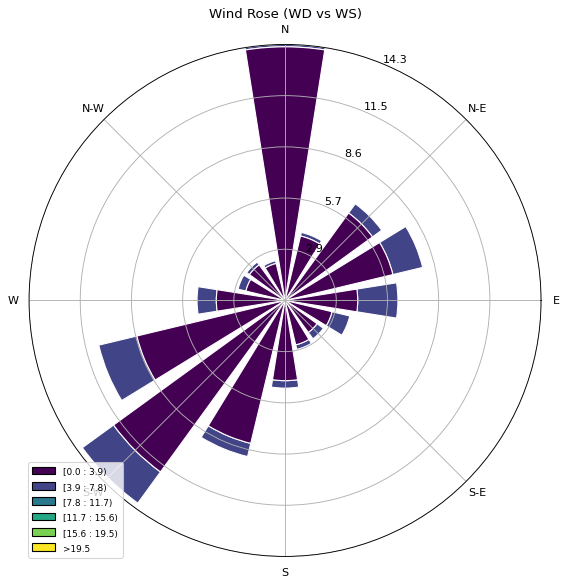

In [33]:
ax = WindroseAxes.from_ax()
ax.bar(df_clean['WD'], df_clean['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Wind Rose (WD vs WS)')
plt.show()

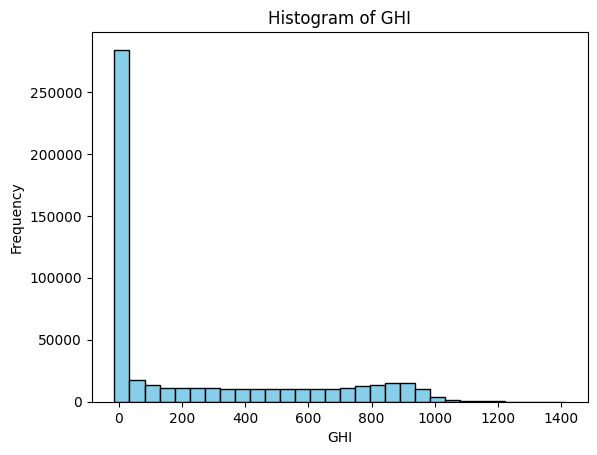

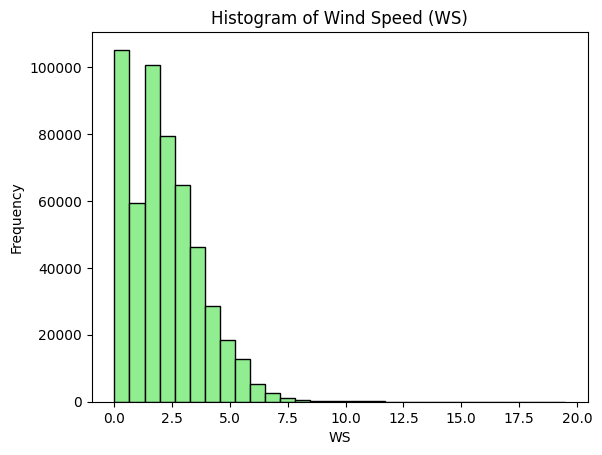

In [34]:
# Histogram of GHI
plt.hist(df_clean['GHI'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of GHI')
plt.xlabel('GHI')
plt.ylabel('Frequency')
plt.show()

# Histogram of WS
plt.hist(df_clean['WS'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Histogram of Wind Speed (WS)')
plt.xlabel('WS')
plt.ylabel('Frequency')
plt.show()


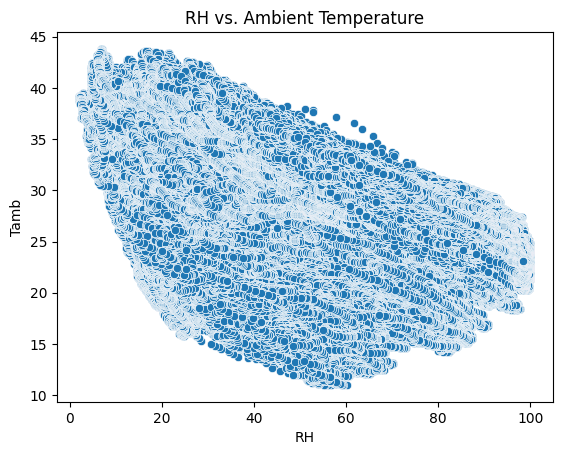

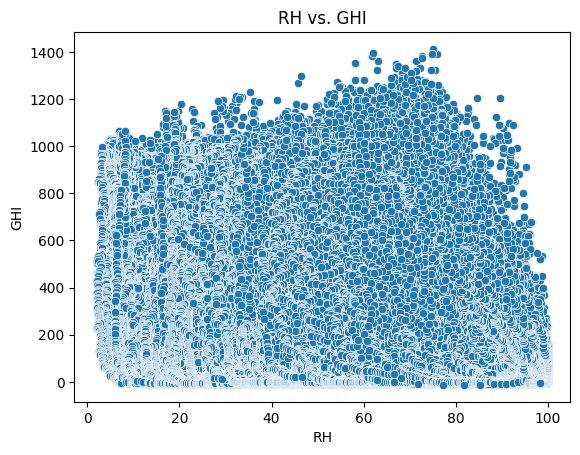

In [35]:
# RH vs Tamb
sns.scatterplot(data=df_clean, x='RH', y='Tamb')
plt.title('RH vs. Ambient Temperature')
plt.show()

# RH vs GHI
sns.scatterplot(data=df_clean, x='RH', y='GHI')
plt.title('RH vs. GHI')
plt.show()


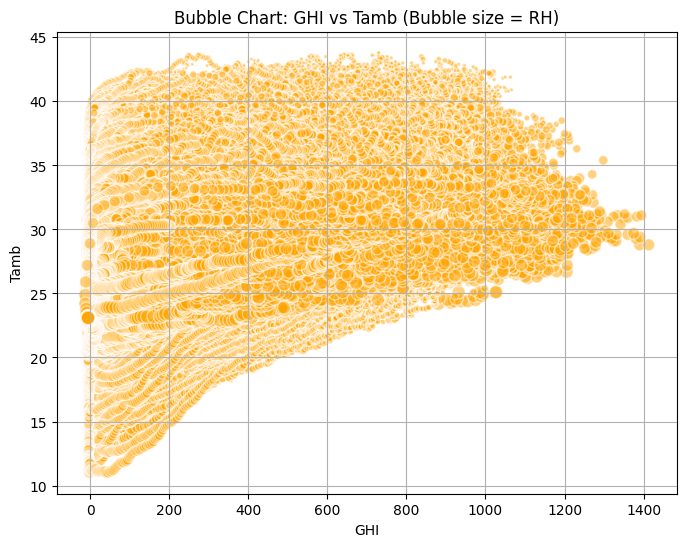

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(df_clean['GHI'], df_clean['Tamb'], s=df_clean['RH'], alpha=0.5, c='orange', edgecolors='w')
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('Bubble Chart: GHI vs Tamb (Bubble size = RH)')
plt.grid(True)
plt.show()
